In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.drop(columns = ['Serial No.'], inplace = True)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
x = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [30]:
calculation = model.fit(x_train_trf, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 0.1297 - val_loss: 0.0704
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0458 - val_loss: 0.0356
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 0.0371
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0282 - val_loss: 0.0333
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0242 - val_loss: 0.0264
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0223
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0186 - val_loss: 0.0198
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.0180
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0161 - val_loss: 0.0160
Epoch 10/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0154
Epoch 11/50
10/10 

In [31]:
y_pred = model.predict(x_test_trf)

4/4 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5453466589953374

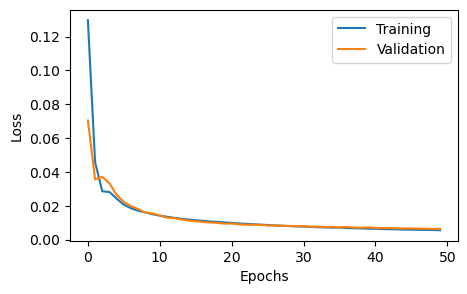

In [33]:
# Create a figure with a specific size
plt.figure(figsize=(5, 3))
# Plot the training loss values stored in the 'loss' key of the 'calculation' object
plt.plot(calculation.history['loss'])
# Plot the validation loss values stored in the 'val_loss' key of the 'calculation' object
plt.plot(calculation.history['val_loss'])
# Add a label to the x-axis
plt.xlabel('Epochs')
# Add a label to the y-axis
plt.ylabel('Loss')
# Add a legend with labels for each line
plt.legend(['Training', 'Validation'])